# Desafio Scikit Learn - Rocketseat

## Imports necessários

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

## Setup dos dados

In [3]:
dados_vendas = {
  'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
  'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}
dados_vendas

{'mes': ['Janeiro',
  'Fevereiro',
  'Março',
  'Abril',
  'Maio',
  'Junho',
  'Julho',
  'Agosto',
  'Setembro',
  'Outubro',
  'Novembro',
  'Dezembro'],
 'vendas': [2000,
  2200,
  2300,
  2500,
  2600,
  2700,
  2800,
  2900,
  3000,
  3100,
  3200,
  3300]}

In [4]:
# Criação do DataFrame
df_vendas = pd.DataFrame.from_dict(dados_vendas)
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


## Engenharia de features

### Transformação dos dados

In [5]:
# Converter os dados de mês em dados numéricos
df_vendas['mes_nome'] = df_vendas['mes'] # separado 'mes_nome' para facilitar visualização
df_vendas['mes'] = range(0, 12)
df_vendas

,mes,vendas,mes_nome
0,0,2000,Janeiro
1,1,2200,Fevereiro
2,2,2300,Março
3,3,2500,Abril
4,4,2600,Maio
5,5,2700,Junho
6,6,2800,Julho
7,7,2900,Agosto
8,8,3000,Setembro
9,9,3100,Outubro


<Axes: xlabel='mes', ylabel='vendas'>

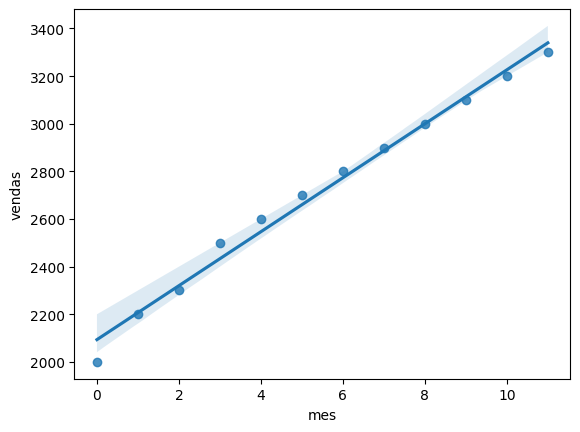

In [6]:
# Exibir o plot de regressão da relação entre mês e vendas
sns.regplot(data=df_vendas, x='mes', y='vendas')

### Estudo do train_test_split e como são divididos os dados em Treinamento e Teste

In [7]:
# Separar a variável dependente da independente
X = df_vendas[['mes']]
y = df_vendas['vendas']
X, y

(    mes
 0     0
 1     1
 2     2
 3     3
 4     4
 5     5
 6     6
 7     7
 8     8
 9     9
 10   10
 11   11,
 0     2000
 1     2200
 2     2300
 3     2500
 4     2600
 5     2700
 6     2800
 7     2900
 8     3000
 9     3100
 10    3200
 11    3300
 Name: vendas, dtype: int64)

In [8]:
# Dividir aleatoriamente conjuntos entre treino e teste
random_X_train, random_X_test, random_y_train, random_y_test = train_test_split(X, y, train_size=0.9, random_state=3)

In [9]:
# Observar o tipo de dados e as divisões feitas entre X e Y no train_test_split
type(random_X_train), type(random_X_test), random_X_train, random_X_test

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
     mes
 1     1
 2     2
 11   11
 6     6
 7     7
 0     0
 3     3
 9     9
 8     8
 10   10,
    mes
 5    5
 4    4)

In [10]:
type(random_y_train), type(random_y_test), random_y_train, random_y_test

(pandas.core.series.Series,
 pandas.core.series.Series,
 1     2200
 2     2300
 11    3300
 6     2800
 7     2900
 0     2000
 3     2500
 9     3100
 8     3000
 10    3200
 Name: vendas, dtype: int64,
 5    2700
 4    2600
 Name: vendas, dtype: int64)

#### Conclusão do estudo
- Sabendo que o "train_test_split" faz a divisão dos dados em DataFrames para X e Series para y, vamos criar os DataFrames para X e Series para y com meses de Janeiro a Outubro como conjunto de treino e apenas Novembro e Dezembro como conjunto de teste

### Split fixo dos dados de Janeiro:Novembro e Dezembro

In [11]:
# Obtendo o conjunto de Janeiro a Novembro como dados de treinamento
df_vendas_train = df_vendas.iloc[0:10]
df_vendas_train

,mes,vendas,mes_nome
0,0,2000,Janeiro
1,1,2200,Fevereiro
2,2,2300,Março
3,3,2500,Abril
4,4,2600,Maio
5,5,2700,Junho
6,6,2800,Julho
7,7,2900,Agosto
8,8,3000,Setembro
9,9,3100,Outubro


In [12]:
# Obtendo o conjunto de Dezembro como dados de teste
df_vendas_test = df_vendas.iloc[10:12]
df_vendas_test

,mes,vendas,mes_nome
10,10,3200,Novembro
11,11,3300,Dezembro


In [13]:
# Criando DataFrame X com os dados de treinamento e teste
X_train = df_vendas_train[['mes']]
X_test = df_vendas_test[['mes']]

type(X_train), type(X_test), X_train, X_test

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
    mes
 0    0
 1    1
 2    2
 3    3
 4    4
 5    5
 6    6
 7    7
 8    8
 9    9,
     mes
 10   10
 11   11)

In [14]:
# Criando Series y com os dados de treinamento e teste
y_train = df_vendas_train['vendas']
y_test = df_vendas_test['vendas']

type(y_train), type(y_test), y_train, y_test

(pandas.core.series.Series,
 pandas.core.series.Series,
 0    2000
 1    2200
 2    2300
 3    2500
 4    2600
 5    2700
 6    2800
 7    2900
 8    3000
 9    3100
 Name: vendas, dtype: int64,
 10    3200
 11    3300
 Name: vendas, dtype: int64)

## Treinar modelo com Regressão Linear Simples

In [15]:
# Treinar o algoritmo de Regressão Linear simples
model = LinearRegression().fit(X_train, y_train)

In [16]:
# Gerar predições do conjunto de testes com base no modelo
y_pred = model.predict(X_test)
y_pred
# A predição para o mês de dezembro foi de 3378.18, relativamente próxima ao valor de 3300 encontrado no conjunto real de testes

array([3260.        , 3378.18181818])

In [17]:
# Verificar coeficiente e intercept da reta y = ax + b do modelo
model.coef_, model.intercept_

(array([118.18181818]), np.float64(2078.181818181818))

## Validar modelo com Regressão Linear Simples

In [18]:
# Verificar score do modelo com relação aos dados de treinamento
model.score(X_train, y_train)
# O resultado de 0.98708... indica alta correlação dentro dos dados de treinamento

0.985690955750836

In [ ]:
# Verificar score do modelo com relação aos dados de teste
model.score(X_test, y_test)
# O resultado de -0.94247... bem próximo de -1 indica alta correlação dentro dos dados de teste

-0.942479338842984

In [20]:
# Obter a MAE (Mean Absolute Error) diferença média entre o predito e o verdadeiro
mean_absolute_error(y_test, y_pred)
# o valor 69.090909... indica que há um erro médio na predição de 69.090909... para mais ou para menos nas predições que o modelo encontrou

np.float64(69.09090909090924)

In [21]:
# Visualização do mesmo MAE em porcentagem
mean_absolute_percentage_error(y_test, y_pred)
# o valor 0.02122... indica um erro médio de 2.122 % para mais ou para menos nas predições que o modelo encontrou

np.float64(0.021220730027548252)

### Conclusão do treinamento
- Conclui-se então que o modelo de regressão linear foi capaz de predizer bem o valor de vendas de Novembro e Dezembro, com um erro médio de apenas 2.122 pontos percentuais para mais ou para menos.

## Visualização da predição do modelo

array([[<Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'vendas'}>]], dtype=object)

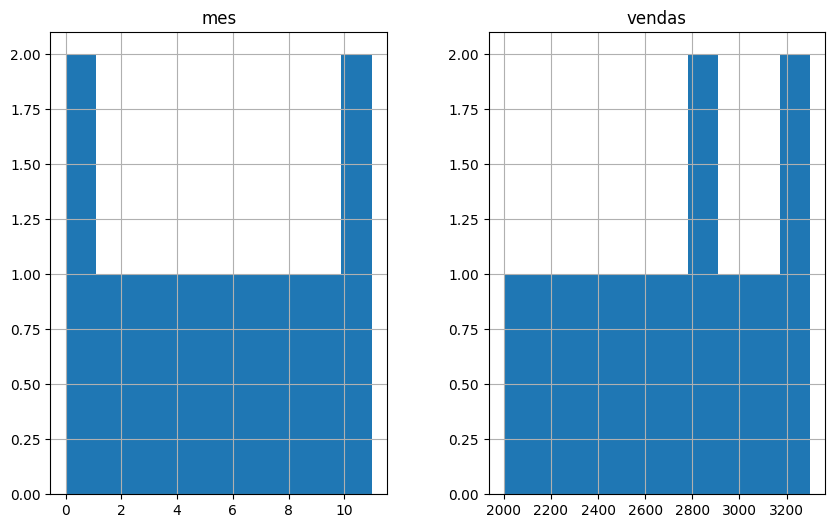

In [22]:
# Histograma dos dados
df_vendas.hist(figsize=(10,6))

Text(0, 0.5, 'Vendas')

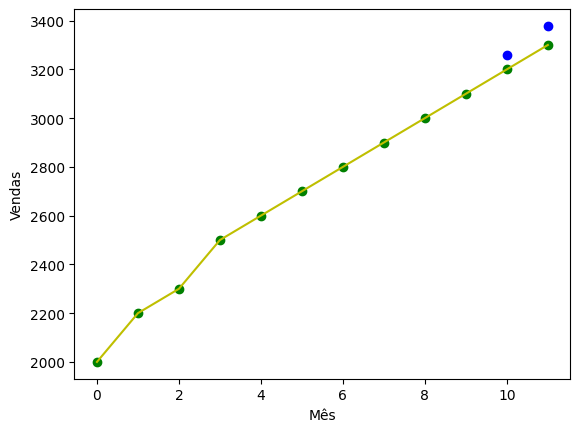

In [23]:
# Mostrar o scatter com os pontos do conjunto de dados, e a reta calculada
plt.scatter(X, y, color='g')
plt.scatter(X_test, y_pred, color='b')
plt.plot(X, y, color='y')
plt.xlabel('Mês')
plt.ylabel('Vendas')